In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Administrateur\Downloads\movies_csv_format.csv')


In [2]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,released_year,country_of_release
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June,1980,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June,1980,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July,1980,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July,1980,United States


In [3]:
# Find data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7668 non-null   object 
 1   rating              7591 non-null   object 
 2   genre               7668 non-null   object 
 3   year                7668 non-null   int64  
 4   score               7665 non-null   float64
 5   votes               7665 non-null   float64
 6   director            7668 non-null   object 
 7   writer              7665 non-null   object 
 8   star                7667 non-null   object 
 9   country             7665 non-null   object 
 10  budget              5497 non-null   float64
 11  gross               7479 non-null   float64
 12  company             7651 non-null   object 
 13  runtime             7664 non-null   float64
 14  released_month      7668 non-null   object 
 15  released_year       7666 non-null   object 
 16  countr

In [4]:
# Find missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
released_month - 0.0%
released_year - 0.0002608242044861763%
country_of_release - 0.007694314032342202%


In [5]:
# Number of Null data
df.isnull().sum().sort_values(ascending = False)

budget                2171
gross                  189
rating                  77
country_of_release      59
company                 17
runtime                  4
score                    3
votes                    3
writer                   3
country                  3
released_year            2
star                     1
director                 0
year                     0
released_month           0
genre                    0
name                     0
dtype: int64

In [6]:
df.sort_values(by=['gross'], inplace = False, ascending= False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,released_year,country_of_release
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April,2019,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,December,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,December,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,April,2018,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,October,2020,United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,February,2020,United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,April,2020,Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October,2020,United States


In [7]:
pd.set_option('display.max_rows', None)

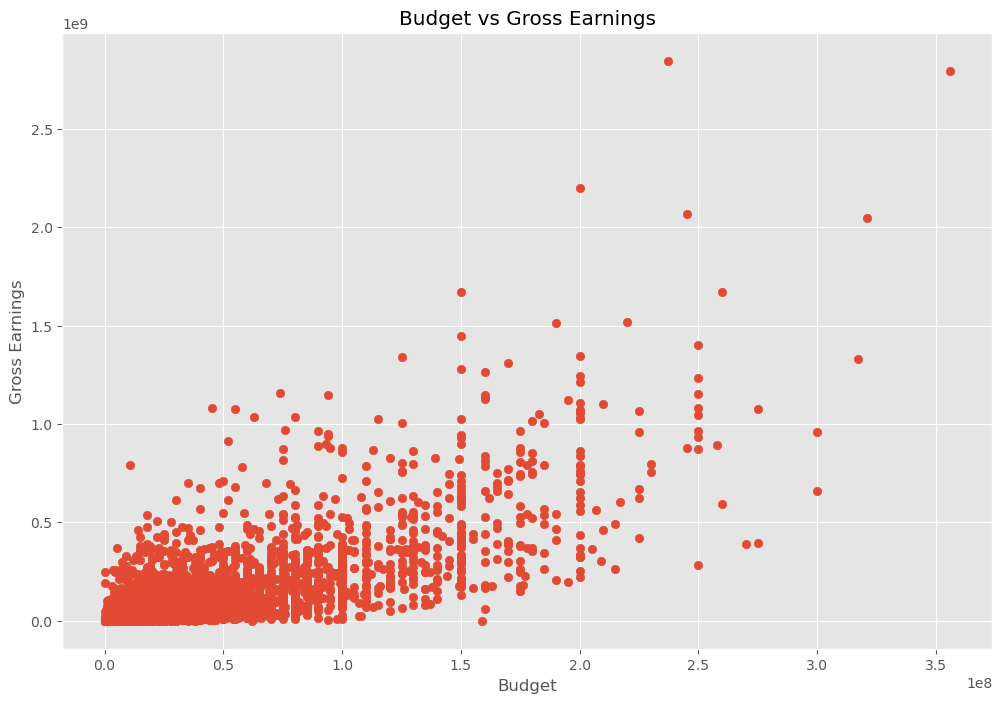

In [8]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')

plt.xlabel('Budget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

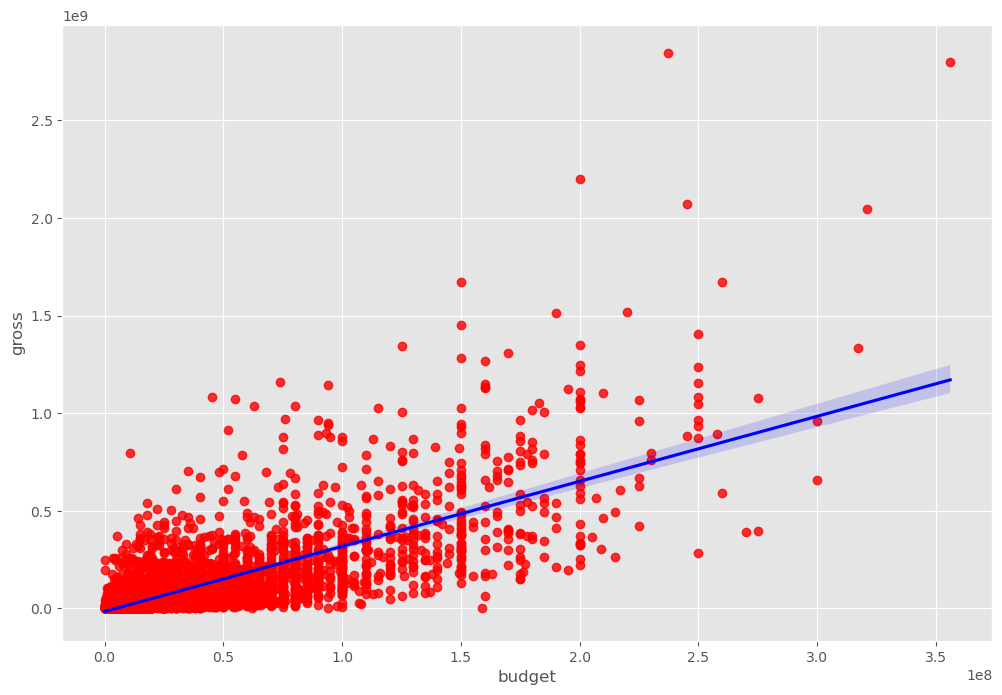

In [9]:
# Plot budget vs gross using seaborn

sns.regplot(x= 'budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [10]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


The default correlation used is the Pearson correlation. this shows that there is a high positive correlation (0.740395) between gross and budget.

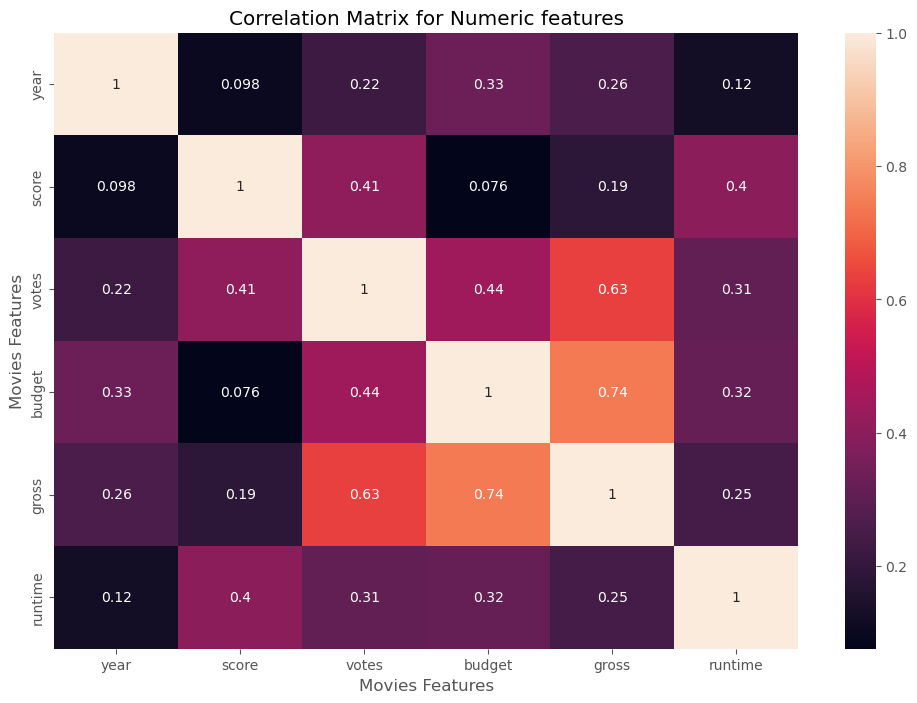

In [11]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

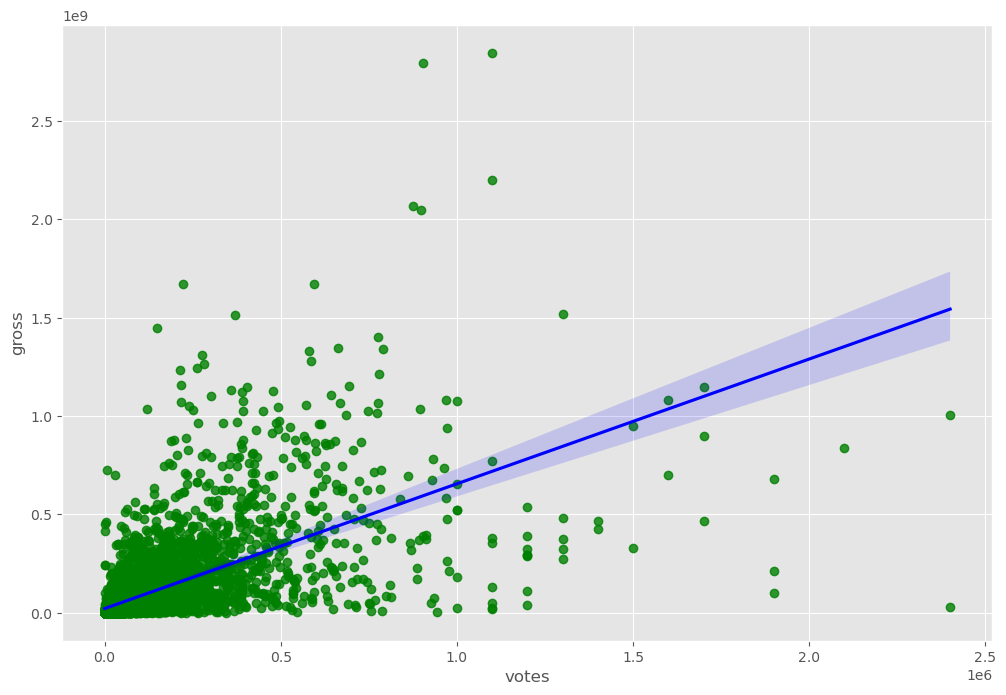

In [12]:
# Plot votes vs gross using seaborn

sns.regplot(x= 'votes', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

The default correlation used is the Pearson correlation. this shows that there is a high positive correlation (0.630757) between gross and votes.

Votes and budget have the highest correlations to gross earnings